In [4]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [5]:
log=lasio.read(r'D:/3. Programing/NSO-R2_logs.las')
log=log.df().reset_index()
log.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT
0,437.0,NaN,NaN,NaN,NaN,NaN
1,438.0,NaN,11.0396,1.6723,1848.2698,NaN
2,439.0,NaN,11.0396,1.6723,1848.2698,NaN
3,440.0,NaN,11.0396,1.6723,1848.2698,NaN
4,441.0,NaN,11.0396,1.6723,1848.2698,NaN


In [6]:
log['P-Impedance']=log['DT']*log['RHOB']
log['S-Impedance']=(log['SDT']/3.2808)*log['RHOB']
log['Lambda-Rho']=log['UNKNOWN:1']
log['Mu-Rho']=log['UNKNOWN:2']
log['VpVs']=log['P-Impedance']/log['S-Impedance']

In [7]:
log.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT,P-Impedance,S-Impedance,Lambda-Rho,Mu-Rho,VpVs
0,437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,438.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN
2,439.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN
3,440.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN
4,441.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN


In [8]:
# star depth 3450 end depth 4250
logInterval= log[(log.DEPTH >= 3450) & (log.DEPTH <= 4250)]
logInterval=logInterval.reset_index()
logInterval=logInterval.drop(['index'],axis=1)
logInterval.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT,P-Impedance,S-Impedance,Lambda-Rho,Mu-Rho,VpVs
0,3450.0,2.2457,18.8465,5.0655,2396.9893,3287.6758,5382.918871,2250.406469,18.8465,5.0655,2.391976
1,3451.0,2.1934,17.6331,5.3215,2424.3276,3451.0269,5317.520158,2307.206292,17.6331,5.3215,2.304744
2,3452.0,2.1756,15.8135,5.5907,2388.2339,3565.1626,5195.841673,2364.169639,15.8135,5.5907,2.197745
3,3453.0,2.2594,16.1620,6.0248,2350.8357,3564.4343,5311.478181,2454.731424,16.1620,6.0248,2.163772
4,3454.0,2.2807,18.2586,5.5366,2374.6208,3383.2866,5415.797659,2351.945181,18.2586,5.5366,2.302689


In [9]:
logtarget= log[(log.DEPTH >= 3690) & (log.DEPTH <= 4000)]
logtarget.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT,P-Impedance,S-Impedance,Lambda-Rho,Mu-Rho,VpVs
3253,3690.0,2.2749,20.8243,11.4027,2901.0764,4868.8179,6599.658702,3376.028359,20.8243,11.4027,1.954859
3254,3691.0,2.2052,12.1751,9.9012,2561.7454,4680.4443,5649.160956,3145.975302,12.1751,9.9012,1.795679
3255,3692.0,2.1647,8.0259,9.2359,2377.7915,4606.0132,5147.205260,3039.087044,8.0259,9.2359,1.693668
3256,3693.0,2.1730,8.6588,9.4336,2414.3433,4637.2373,5246.367991,3071.420584,8.6588,9.4336,1.708124
3257,3694.0,2.2020,12.0309,9.7035,2545.8105,4641.3223,5605.874721,3115.152312,12.0309,9.7035,1.799551


In [10]:
AIaveragetarget= logtarget['P-Impedance'].mean()

In [11]:
EEItest=AIaveragetarget*(((logInterval['P-Impedance']/AIaveragetarget)**(math.cos(math.radians(180))))*((logInterval['S-Impedance']/AIaveragetarget)**(math.sin(math.radians(180)))))

In [12]:
Chiangle=np.arange(-180,181,1)
EEIVal=[]
for i in range(len(Chiangle)):
    # print(math.sin(math.radians(Chiangle[i])))
    EEI=AIaveragetarget*(((logInterval['P-Impedance']/AIaveragetarget)**(math.cos(math.radians(Chiangle[i]))))*((logInterval['S-Impedance']/AIaveragetarget)**(math.sin(math.radians(Chiangle[i])))))
    EEIVal.append(EEI)

In [13]:
EEIuse=np.array(EEIVal)
EEIValt=np.transpose(EEIuse)


In [14]:
num_rows = len(logInterval['P-Impedance'])
num_cols = len(Chiangle)
data = {}
for i in range(num_cols):
    col_name = f'{Chiangle[i]}'
    data[col_name] = EEIuse[i]
EEIdata = pd.DataFrame(data)

In [15]:
EEIdata.head()

,-180,-179,-178,-177,-176,-175,-174,-173,-172,-171,...,171,172,173,174,175,176,177,178,179,180
0,8385.311684,8546.623557,8710.400043,8876.612803,9045.229703,9216.214698,9389.527721,9565.124580,9742.956855,9922.971798,...,7047.363157,7185.785194,7326.775985,7470.335881,7616.462548,7765.150836,7916.392656,8070.176854,8226.489083,8385.311684
1,8488.440318,8647.957091,8809.794008,8973.918680,9140.294988,9308.882975,9479.638752,9652.514405,9827.457904,10004.413020,...,7160.831546,7298.571536,7438.773310,7581.433074,7726.544322,7874.097714,8024.080964,8176.478720,8331.272448,8488.440318
2,8687.226314,8846.681083,9008.307510,9172.067345,9337.918602,9505.815470,9675.708231,9847.543179,10021.262547,10196.804443,...,7354.445058,7493.201619,7634.322296,7777.797938,7923.616587,8071.763373,8222.220398,8374.966634,8529.977810,8687.226314
3,8498.096192,8648.432855,8800.752082,8955.017528,9111.189487,9269.224812,9429.076850,9590.695368,9754.026489,9919.012643,...,7238.722950,7370.093657,7503.636924,7639.342731,7777.198505,7917.189026,8059.296332,8203.499620,8349.775159,8498.096192
4,8334.405262,8488.205508,8644.228230,8802.443013,8962.815945,9125.309523,9289.882559,9456.490093,9625.083311,9795.609464,...,7053.633230,7186.588782,7321.900207,7459.563871,7599.573600,7741.920565,7886.593175,8033.576971,8182.854509,8334.405262


### EEI For AI

In [16]:
EEIdataforAI=EEIdata
EEIdataforAI['AI']=logInterval['P-Impedance']
corr_matrixAI = EEIdataforAI.corr()['AI']
corr_matrixAI1=corr_matrixAI.iloc[0:361]
searchcorrmatrixAI=np.array([Chiangle,corr_matrixAI1])
searchcorrmatrixAI=np.transpose(searchcorrmatrixAI)
searchdatacorrAI = pd.DataFrame(searchcorrmatrixAI,columns =['Chiangle', 'Correlation'])
searchdatacorrAI.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorAI=searchdatacorrAI[(searchdatacorrAI['Correlation'] ==searchdatacorrAI['Correlation'].max())]



### EEI For SI

In [17]:
EEIdataforSI=EEIdata
EEIdataforSI['SI']=logInterval['S-Impedance']
corr_matrixSI = EEIdataforSI.corr()['SI']
corr_matrixSI1=corr_matrixSI.iloc[0:361]
searchcorrmatrixSI=np.array([Chiangle,corr_matrixSI1])
searchcorrmatrixSI=np.transpose(searchcorrmatrixSI)
searchdatacorrSI = pd.DataFrame(searchcorrmatrixSI,columns =['Chiangle', 'Correlation'])
searchdatacorrSI.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorSI=searchdatacorrSI[(searchdatacorrSI['Correlation'] ==searchdatacorrSI['Correlation'].max())]
print(scattersearchmaxcorSI)

     Chiangle  Correlation
270      90.0          1.0


### EEI For LR

In [18]:
EEIdataforLR=EEIdata
EEIdataforLR['LR']=logInterval['Lambda-Rho']
corr_matrixLR = EEIdataforLR.corr()['LR']
corr_matrixLR1=corr_matrixLR.iloc[0:361]
searchcorrmatrixLR=np.array([Chiangle,corr_matrixLR1])
searchcorrmatrixLR=np.transpose(searchcorrmatrixLR)
searchdatacorrLR = pd.DataFrame(searchcorrmatrixLR,columns =['Chiangle', 'Correlation'])
searchdatacorrLR.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorLR=searchdatacorrLR[(searchdatacorrLR['Correlation'] ==searchdatacorrLR['Correlation'].max())]       
print(scattersearchmaxcorLR)

     Chiangle  Correlation
159     -21.0     0.972227


### EEI For MR

In [19]:
EEIdataforMR=EEIdata
EEIdataforMR['MR']=logInterval['Mu-Rho']
corr_matrixMR = EEIdataforMR.corr()['MR']
corr_matrixMR1=corr_matrixMR.iloc[0:361]
searchcorrmatrixMR=np.array([Chiangle,corr_matrixMR1])
searchcorrmatrixMR=np.transpose(searchcorrmatrixMR)
searchdatacorrMR = pd.DataFrame(searchcorrmatrixMR,columns =['Chiangle', 'Correlation'])
searchdatacorrMR.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorMR=searchdatacorrMR[(searchdatacorrMR['Correlation'] ==searchdatacorrMR['Correlation'].max())]       
print(scattersearchmaxcorMR)

     Chiangle  Correlation
257      77.0     0.991455


### EEI for Vp/VS

In [20]:
EEIdataforVpVs=EEIdata
EEIdataforVpVs['VpVs']=logInterval['VpVs']
corr_matrixVpVs = EEIdataforMR.corr()['VpVs']
corr_matrixVpVs1=corr_matrixVpVs.iloc[0:361]
searchcorrmatrixVpVs=np.array([Chiangle,corr_matrixVpVs1])
searchcorrmatrixVpVs=np.transpose(searchcorrmatrixVpVs)
searchdatacorrVpVs = pd.DataFrame(searchcorrmatrixVpVs,columns =['Chiangle', 'Correlation'])
searchdatacorrVpVs.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorVpVs=searchdatacorrVpVs[(searchdatacorrVpVs['Correlation'] ==searchdatacorrVpVs['Correlation'].max())]       
print(str(scattersearchmaxcorVpVs))

     Chiangle  Correlation
135     -45.0     0.999494


In [29]:
print(float(scattersearchmaxcorVpVs['Correlation']))

0.9994936867950621


(-100.0, 100.0)

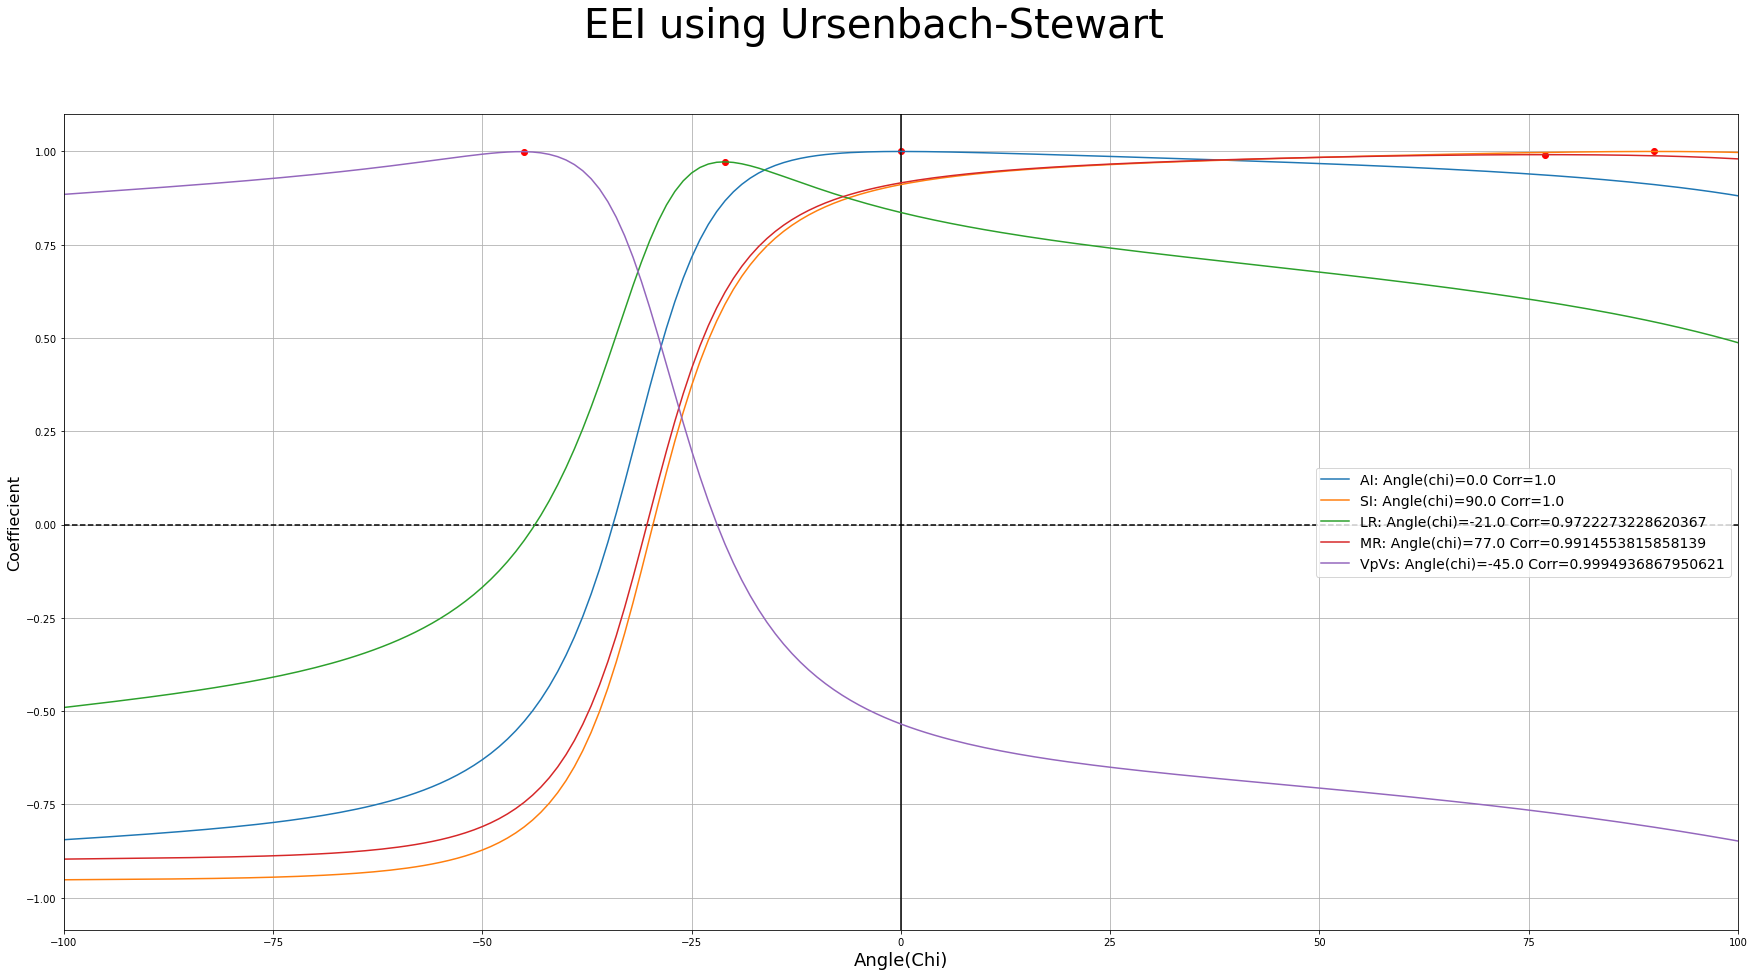

In [33]:
fig,ax=plt.subplots(figsize=(30,15))
plt.grid()
plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0,color="black")
plt.plot(Chiangle,corr_matrixAI1,label=f"AI: Angle(chi)={float(scattersearchmaxcorAI['Chiangle'])} Corr={float(scattersearchmaxcorAI['Correlation'])}")
plt.plot(Chiangle,corr_matrixSI1,label=f"SI: Angle(chi)={float(scattersearchmaxcorSI['Chiangle'])} Corr={float(scattersearchmaxcorSI['Correlation'])}")
plt.plot(Chiangle,corr_matrixLR1,label=f"LR: Angle(chi)={float(scattersearchmaxcorLR['Chiangle'])} Corr={float(scattersearchmaxcorLR['Correlation'])}")
plt.plot(Chiangle,corr_matrixMR1,label=f"MR: Angle(chi)={float(scattersearchmaxcorMR['Chiangle'])} Corr={float(scattersearchmaxcorMR['Correlation'])}")
plt.plot(Chiangle,corr_matrixVpVs1,label=f"VpVs: Angle(chi)={float(scattersearchmaxcorVpVs['Chiangle'])} Corr={float(scattersearchmaxcorVpVs['Correlation'])}")
plt.scatter(scattersearchmaxcorAI['Chiangle'],scattersearchmaxcorAI['Correlation'],color='r')
plt.scatter(scattersearchmaxcorSI['Chiangle'],scattersearchmaxcorSI['Correlation'],color='r')
plt.scatter(scattersearchmaxcorLR['Chiangle'],scattersearchmaxcorLR['Correlation'],color='r')
plt.scatter(scattersearchmaxcorMR['Chiangle'],scattersearchmaxcorMR['Correlation'],color='r')
plt.scatter(scattersearchmaxcorVpVs['Chiangle'],scattersearchmaxcorVpVs['Correlation'],color='r')
fig.suptitle('EEI using Ursenbach-Stewart', fontsize=40)
plt.xlabel('Angle(Chi)', fontsize=18)
plt.ylabel('Coeffiecient', fontsize=16)
plt.legend(fontsize=14)
plt.xlim(-100,100)